In [98]:
import logging

import awkward as ak
import h5py as h5
import numpy as np
import numba as nb
import vector
vector.register_awkward()
vector.register_numba()
ak.numba.register_and_check()

logging.basicConfig(level=logging.INFO)

from hist.intervals import clopper_pearson_interval

import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

In [125]:
N_AK5_JETS = 10
PRED_INDEX_SHIFT = 1
dp_cut = 0.5
ap_cut = 1 / 13

In [38]:
# read test target file
test_file = "/storage/af/user/tsievert/topNet/SPAtop/data/delphes/v4/tt_hadronic_testing_SLIMMED.h5"
test_h5 = h5.File(test_file)
test_h5_dict = {
    'INPUTS': 'INPUTS', 'TARGETS': 'TARGETS'
}

# # read baseline prediction
# baseline_file = "pred_baseline.h5"
# b_h5 = h5.File(baseline_file)
# b_h5_dict = {
#     'INPUTS': 'INPUTS', 'TARGETS': 'TARGETS'
# }

# read spanet prediction
spanet_file = "/storage/af/user/tsievert/topNet/SPAtop/data/delphes/v4/tt_hadronic_predict.h5"
s_h5 = h5.File(spanet_file)
s_h5_dict = {
    'INPUTS': 'SpecialKey.Inputs', 'TARGETS': 'SpecialKey.Targets'
}

In [111]:
print(test_h5.keys())

print('-'*60+'\n'+'INPUTS')
print(test_h5['INPUTS'].keys())

print(f"input jets pt type = {ak.type(test_h5['INPUTS']['Jets']['pt'])}")


print('-'*60+'\n'+'TARGETS')
print(test_h5['TARGETS'].keys())

print(f"FRt1 b min = {np.min(test_h5['TARGETS']['FRt1']['b'])}, FRt1 b max = {np.max(test_h5['TARGETS']['FRt1']['b'])}")
print(f"FRt1 b type = {ak.type(test_h5['TARGETS']['FRt1']['b'])}")
print(f"FRt1 q1 min = {np.min(test_h5['TARGETS']['FRt1']['q1'])}, FRt1 b max = {np.max(test_h5['TARGETS']['FRt1']['q1'])}")
print(f"FRt1 q1 type = {ak.type(test_h5['TARGETS']['FRt1']['q1'])}")
print(f"FRt1 q2 min = {np.min(test_h5['TARGETS']['FRt1']['q2'])}, FRt1 b max = {np.max(test_h5['TARGETS']['FRt1']['q2'])}")
print(f"FRt1 q2 type = {ak.type(test_h5['TARGETS']['FRt1']['q2'])}")
print(f"SRbqt1 bq min = {np.min(test_h5['TARGETS']['SRbqt1']['bq'])}, SRbqt1 bq max = {np.max(test_h5['TARGETS']['SRbqt1']['bq'])}")
print(f"SRqqt1 qq min = {np.min(test_h5['TARGETS']['SRqqt1']['qq'])}, SRqqt1 qq max = {np.max(test_h5['TARGETS']['SRqqt1']['qq'])}")
print(f"FBt1 bqq min = {np.min(test_h5['TARGETS']['FBt1']['bqq'])}, FBt1 bqq max = {np.max(test_h5['TARGETS']['FBt1']['bqq'])}")

<KeysViewHDF5 ['INPUTS', 'TARGETS']>
------------------------------------------------------------
INPUTS
<KeysViewHDF5 ['BoostedJets', 'Jets', 'VeryBoostedJets']>
input jets pt type = 294459 * var * float64
------------------------------------------------------------
TARGETS
<KeysViewHDF5 ['FBt1', 'FBt2', 'FRt1', 'FRt2', 'SRbqt1', 'SRbqt2', 'SRqqt1', 'SRqqt2']>
FRt1 b min = -1, FRt1 b max = 9
FRt1 b type = 294459 * int64
FRt1 q1 min = -1, FRt1 b max = 9
FRt1 q1 type = 294459 * int64
FRt1 q2 min = -1, FRt1 b max = 9
FRt1 q2 type = 294459 * int64
SRbqt1 bq min = -1, SRbqt1 bq max = 1
SRqqt1 qq min = -1, SRqqt1 qq max = 1
FBt1 bqq min = -1, FBt1 bqq max = 1


In [ ]:
print(s_h5.keys())

print('-'*60+'\n'+'INPUTS')
print(s_h5['SpecialKey.Inputs'].keys())

print(f"input jets pt type = {ak.type(s_h5['SpecialKey.Inputs']['Jets']['pt'])}")


print('-'*60+'\n'+'TARGETS')
print(s_h5['SpecialKey.Targets'].keys())

print(f"FRt1 b min = {np.min(s_h5['SpecialKey.Targets']['FRt1']['b'])}, FRt1 b max = {np.max(s_h5['SpecialKey.Targets']['FRt1']['b'])}")
print(f"FRt1 b type = {ak.type(s_h5['SpecialKey.Targets']['FRt1']['b'])}")
print(f"FRt1 q1 min = {np.min(s_h5['SpecialKey.Targets']['FRt1']['q1'])}, FRt1 b max = {np.max(s_h5['SpecialKey.Targets']['FRt1']['q1'])}")
print(f"FRt1 q1 type = {ak.type(s_h5['SpecialKey.Targets']['FRt1']['q1'])}")
print(f"FRt1 q2 min = {np.min(s_h5['SpecialKey.Targets']['FRt1']['q2'])}, FRt1 b max = {np.max(s_h5['SpecialKey.Targets']['FRt1']['q2'])}")
print(f"FRt1 q2 type = {ak.type(s_h5['SpecialKey.Targets']['FRt1']['q2'])}")
print(f"SRbqt1 bq min = {np.min(s_h5['SpecialKey.Targets']['SRbqt1']['bq'])}, SRbqt1 bq max = {np.max(s_h5['SpecialKey.Targets']['SRbqt1']['bq'])}")
print(f"SRqqt1 qq min = {np.min(s_h5['SpecialKey.Targets']['SRqqt1']['qq'])}, SRqqt1 qq max = {np.max(s_h5['SpecialKey.Targets']['SRqqt1']['qq'])}")
print(f"FBt1 bqq min = {np.min(s_h5['SpecialKey.Targets']['FBt1']['bqq'])}, FBt1 bqq max = {np.max(s_h5['SpecialKey.Targets']['FBt1']['bqq'])}")

<KeysViewHDF5 ['SpecialKey.Inputs', 'SpecialKey.Targets']>
------------------------------------------------------------
INPUTS
<KeysViewHDF5 ['BoostedJets', 'Jets', 'VeryBoostedJets']>
input jets pt type = 294459 * var * float64
------------------------------------------------------------
TARGETS
<KeysViewHDF5 ['FBt1', 'FBt2', 'FRt1', 'FRt2', 'SRbqt1', 'SRbqt2', 'SRqqt1', 'SRqqt2']>
FRt1 b min = 0, FRt1 b max = 11
FRt1 b type = 294459 * int64
FRt1 q1 min = 0, FRt1 b max = 11
FRt1 q1 type = 294459 * int64
FRt1 q2 min = 0, FRt1 b max = 11
FRt1 q2 type = 294459 * int64
SRbqt1 bq min = -2, SRbqt1 bq max = 12
SRqqt1 qq min = -2, SRqqt1 qq max = 13
FBt1 bqq min = -2, FBt1 bqq max = 13


In [39]:
def sel_pred_by_dp_ap(dps, aps, b_ps, q1_ps, q2_ps, dp_cut, ap_cut):
    # parse predicted top assignment by DP 
    dp_filter = dps > dp_cut # minimal detection probability to be considered a top
    ap_filter = aps > ap_cut # minimal assignment probability to be considered a top
    filter = ap_filter & dp_filter

    # b jet
    b_ps_passed = b_ps.mask[filter] 
    b_ps_passed = ak.drop_none(b_ps_passed)
    # q1 jets
    q1_ps_passed = q1_ps.mask[filter]
    q1_ps_passed = ak.drop_none(q1_ps_passed)
    # q2 jets
    q2_ps_passed = q2_ps.mask[filter]
    q2_ps_passed = ak.drop_none(q2_ps_passed)

    return b_ps_passed, q1_ps_passed, q2_ps_passed

In [40]:
def sel_target_by_mask(b_ts, q1_ts, q2_ts, FRt_pts, FRt_masks): # looks at boosted baseline
    # b jets
    b_ts_selected = b_ts.mask[FRt_masks] # applying mask so that only events with the minimal number of jets are selected
    b_ts_selected = ak.drop_none(b_ts_selected)
    # q1 jets
    q1_ts_selected = q1_ts.mask[FRt_masks] # applying mask so that only events with the minimal number of jets are selected
    q1_ts_selected = ak.drop_none(q1_ts_selected)
    # q2 jets
    q2_ts_selected = q2_ts.mask[FRt_masks] # applying mask so that only events with the minimal number of jets are selected
    q2_ts_selected = ak.drop_none(q2_ts_selected)

    FRt_selected_pts = FRt_pts.mask[FRt_masks]
    FRt_selected_pts = ak.drop_none(FRt_selected_pts)

    return b_ts_selected, q1_ts_selected, q2_ts_selected, FRt_selected_pts

In [123]:
# A pred look up table is in shape
# [event,
#    pred_t,
#       [correct, FRt_pt]]
@nb.njit
def gen_pred_LUT(
    b_ps_selected, q1_ps_selected, q2_ps_selected, jet4mom,
    b_ts_selected, q1_ts_selected, q2_ts_selected, 
    LUT_builder
):
    # for each event
    for b_t_event, q1_t_event, q2_t_event, b_p_event, q1_p_event, q2_p_event, jet4mom_event in zip(
        b_ps_selected, q1_ps_selected, q2_ps_selected, b_ts_selected, q1_ts_selected, q2_ts_selected, jet4mom
    ):
        LUT_builder.begin_list()

        # for each predicted {b,q1,q1} assignment, check if any FRt have a same {b,q1,q2} assignment
        for b_p, q1_p, q2_p in zip(b_p_event, q1_p_event, q2_p_event):

            correct = 0
            predTop_pt = (jet4mom_event[b_p-PRED_INDEX_SHIFT] + jet4mom_event[q1_p-PRED_INDEX_SHIFT] + jet4mom_event[q2_p-PRED_INDEX_SHIFT]).pt

            for b_t, q1_t, q2_t in zip(b_t_event, q1_t_event, q2_t_event):
                if b_p-PRED_INDEX_SHIFT == b_t and q1_p-PRED_INDEX_SHIFT == q1_t and q2_p-PRED_INDEX_SHIFT == q2_t:
                    correct = 1

            LUT_builder.begin_list()
            LUT_builder.append(correct)
            LUT_builder.append(predTop_pt)
            LUT_builder.end_list()
        
        LUT_builder.end_list()

    return LUT_builder

# A pred look up table is in shape
# [event,
#    pred_q,
#       [correct, jet_pt]]
@nb.njit
def gen_pred_qLUT(
    q_ps_selected, q_ts_selected, pts, qLUT_builder
):
    # for each event
    for q_t_event, q_p_event, pt_event in zip(
        q_ps_selected, q_ts_selected, pts
    ):
        qLUT_builder.begin_list()

        # for each predicted bb assignment, check if any target H have a same bb assignment
        for q_p in q_p_event:

            correct = 0
            predq_pt = pt_event[q_p-PRED_INDEX_SHIFT]

            for q_t in q_t_event:
                if q_p-PRED_INDEX_SHIFT == q_t:
                    correct = 1

            qLUT_builder.begin_list()
            qLUT_builder.append(correct)
            qLUT_builder.append(predq_pt)
            qLUT_builder.end_list()

        qLUT_builder.end_list()

    return qLUT_builder

In [124]:
# A target look up table is in shape
# [event,
#    target_t,
#        [retrieved, FRt_pt]]
@nb.njit
def gen_target_LUT(
    b_ps_selected, q1_ps_selected, q2_ps_selected, 
    b_ts_selected, q1_ts_selected, q2_ts_selected, FRt_selected_pts, 
    LUT_builder
):
    # for each event
    for b_t_event, q1_t_event, q2_t_event, b_p_event, q1_p_event, q2_p_event, FRt_pt_event in zip(
        b_ps_selected, q1_ps_selected, q2_ps_selected, b_ts_selected, q1_ts_selected, q2_ts_selected, FRt_selected_pts
    ):
        LUT_builder.begin_list()

        # for each predicted {b,q1,q1} assignment, check if any FRt have a same {b,q1,q2} assignment
        for i, (b_t, q1_t, q2_t, FRt_pt) in enumerate(zip(b_t_event, q1_t_event, q2_t_event, FRt_pt_event)):

            retrieved = 0

            for b_p, q1_p, q2_p in zip(b_p_event, q1_p_event, q2_p_event):
                if b_p-PRED_INDEX_SHIFT == b_t and q1_p-PRED_INDEX_SHIFT == q1_t and q2_p-PRED_INDEX_SHIFT == q2_t:
                    retrieved = 1

            LUT_builder.begin_list()
            LUT_builder.append(retrieved)
            LUT_builder.append(FRt_pt)
            LUT_builder.end_list()
        
        LUT_builder.end_list()

    return LUT_builder

# A target look up table is in shape
# [event,
#    target_q,
#        [retrieved, jet_pt]]
@nb.njit
def gen_target_qLUT(
    q_ps_selected, q_ts_selected, pts, qLUT_builder
):
    # for each event
    for q_t_event, q_p_event, pt_event in zip(
        q_ps_selected, q_ts_selected, pts
    ):
        qLUT_builder.begin_list()

        # for each predicted bb assignment, check if any target H have a same bb assignment
        for q_t in q_t_event:

            retrieved = 0
            predq_pt = pt_event[q_t]

            for q_p in q_p_event:
                if q_p-PRED_INDEX_SHIFT == q_t:
                    retrieved = 1

            qLUT_builder.begin_list()
            qLUT_builder.append(retrieved)
            qLUT_builder.append(predq_pt)
            qLUT_builder.end_list()

        qLUT_builder.end_list()

    return qLUT_builder

In [ ]:
# generate pred/target LUT
# each entry corresponds to [recot correct or not, reco t pt]
# or
# [targett retrieved or not, target t pt]
def parse_pred_w_target(
        testfile, predfile, dp_cut=0.5, ap_cut=1 / 13, 
        testfile_dict={'INPUTS': 'INPUTS', 'TARGETS': 'TARGETS'},
        predfile_dict={'INPUTS': 'INPUTS', 'TARGETS': 'TARGETS'},
    ):
    # Collect t pt, mask, target and predicted jet and fjets for 3 ts in each event
    # t pt
    FRt1_pt = np.array(testfile[testfile_dict["TARGETS"]]["FRt1"]["pt"])
    FRt2_pt = np.array(testfile[testfile_dict["TARGETS"]]["FRt2"]["pt"])

    # mask
    FRt1_mask = np.array(testfile[testfile_dict["TARGETS"]]["FRt1"]["mask"])
    FRt2_mask = np.array(testfile[testfile_dict["TARGETS"]]["FRt2"]["mask"])

    # target jets
    b_FRt1_t = np.array(testfile[testfile_dict["TARGETS"]]["FRt1"]["b"])
    b_FRt2_t = np.array(testfile[testfile_dict["TARGETS"]]["FRt2"]["b"])

    q1_FRt1_t = np.array(testfile[testfile_dict["TARGETS"]]["FRt1"]["q1"])
    q1_FRt2_t = np.array(testfile[testfile_dict["TARGETS"]]["FRt2"]["q1"])

    q2_FRt1_t = np.array(testfile[testfile_dict["TARGETS"]]["FRt1"]["q2"])
    q2_FRt2_t = np.array(testfile[testfile_dict["TARGETS"]]["FRt2"]["q2"])

    # pred jets
    b_FRt1_p = np.array(predfile[predfile_dict["TARGETS"]]["FRt1"]["b"])
    b_FRt2_p = np.array(predfile[predfile_dict["TARGETS"]]["FRt2"]["b"])

    q1_FRt1_p = np.array(predfile[predfile_dict["TARGETS"]]["FRt1"]["q1"])
    q1_FRt2_p = np.array(predfile[predfile_dict["TARGETS"]]["FRt2"]["q1"])

    q2_FRt1_p = np.array(predfile[predfile_dict["TARGETS"]]["FRt1"]["q2"])
    q2_FRt2_p = np.array(predfile[predfile_dict["TARGETS"]]["FRt2"]["q2"])

    # jet detection probability
    dp_FRt1 = np.array(predfile[predfile_dict["TARGETS"]]["FRt1"]["detection_probability"])
    dp_FRt2 = np.array(predfile[predfile_dict["TARGETS"]]["FRt2"]["detection_probability"])

    # jet assignment probability
    ap_FRt1 = np.array(predfile[predfile_dict["TARGETS"]]["FRt1"]["assignment_probability"])
    ap_FRt2 = np.array(predfile[predfile_dict["TARGETS"]]["FRt2"]["assignment_probability"])

    # collect jet pt
    pts = np.array(testfile[testfile_dict["INPUTS"]]["Jets"]["pt"])
    etas = np.array(testfile[testfile_dict["INPUTS"]]["Jets"]["eta"])
    phis = np.array(testfile[testfile_dict["INPUTS"]]["Jets"]["phi"])
    masses = np.array(testfile[testfile_dict["INPUTS"]]["Jets"]["mass"])
    jet4moms = ak.zip(
        {
            'rho': pts,
            'phi': phis,
            'eta': etas,
            'tau': masses
        }, with_name='Momentum4D'
    )

    # convert some arrays to ak array
    # true Fully Resolved tops pt and masks
    FRt_masks = np.concatenate(
        (FRt1_mask.reshape(-1, 1), FRt2_mask.reshape(-1, 1)), axis=1
    )
    FRt_masks = ak.Array(FRt_masks)
    FRt_pts = np.concatenate(
        (FRt1_pt.reshape(-1, 1), FRt2_pt.reshape(-1, 1)), axis=1
    )
    FRt_pts = ak.Array(FRt_pts)

    # true target jets
    b_ts = np.concatenate(
        (b_FRt1_t.reshape(-1, 1), b_FRt2_t.reshape(-1, 1)), axis=1
    )
    b_ts = ak.Array(b_ts)
    q1_ts = np.concatenate(
        (q1_FRt1_t.reshape(-1, 1), q1_FRt2_t.reshape(-1, 1)), axis=1
    )
    q1_ts = ak.Array(q1_ts)
    q2_ts = np.concatenate(
        (q2_FRt1_t.reshape(-1, 1), q2_FRt2_t.reshape(-1, 1)), axis=1
    )
    q2_ts = ak.Array(q2_ts)

    # predicted jets
    b_ps = np.concatenate(
        (b_FRt1_p.reshape(-1, 1), b_FRt2_p.reshape(-1, 1)), axis=1
    )
    b_ps = ak.Array(b_ps)
    q1_ps = np.concatenate(
        (q1_FRt1_p.reshape(-1, 1), q1_FRt2_p.reshape(-1, 1)), axis=1
    )
    q1_ps = ak.Array(q1_ps)
    q2_ps = np.concatenate(
        (q2_FRt1_p.reshape(-1, 1), q2_FRt2_p.reshape(-1, 1)), axis=1
    )
    q2_ps = ak.Array(q2_ps)

    # top detection and assignment probabilities
    dps = np.concatenate(
        (dp_FRt1.reshape(-1, 1), dp_FRt2.reshape(-1, 1)), axis=1
    )
    dps = ak.Array(dps)
    aps = np.concatenate(
        (ap_FRt1.reshape(-1, 1), ap_FRt2.reshape(-1, 1)), axis=1
    )
    aps = ak.Array(aps)
    
    pts = ak.Array(pts)

    # select predictions and targets
    b_ts_selected, q1_ts_selected, q2_ts_selected, FRt_selected_pts = sel_target_by_mask(b_ts, q1_ts, q2_ts, FRt_pts, FRt_masks)
    b_ps_selected, q1_ps_selected, q2_ps_selected = sel_pred_by_dp_ap(dps, aps, b_ps, q1_ps, q2_ps, dp_cut, ap_cut)

    # print(ak.type(FRt_pts))
    # print(ak.type(FRt_selected_pts))
    # print(ak.num(FRt_selected_pts))
    # print(ak.type(b_ts_selected))
    # print(ak.type(q1_ts_selected))
    # print(ak.type(q2_ts_selected))
    # print(ak.type(FRt_selected_pts))
    # print(f"b_ts_selected = q1_ts_selected? {ak.all(ak.num(b_ts_selected) == ak.num(q1_ts_selected))}")
    # print(f"b_ts_selected = q2_ts_selected? {ak.all(ak.num(b_ts_selected) == ak.num(q2_ts_selected))}")
    # print(f"q1_ts_selected = q2_ts_selected? {ak.all(ak.num(q1_ts_selected) == ak.num(q2_ts_selected))}")
    # print(f"b_ts_selected = FRt_selected_pts? {ak.all(ak.num(b_ts_selected) == ak.num(FRt_selected_pts))}")
    # print(f"  -> num b_ts_selected != FRt_selected_pts? {ak.sum(ak.num(b_ts_selected) != ak.num(FRt_selected_pts), axis=0)}")
    # print(ak.sum(ak.num(b_ts_selected) > 0))
    # print(ak.sum(ak.num(b_ps_selected) > 0))
    # print(f"min b truth = {ak.min(b_ts_selected, axis=None)}, max b truth = {ak.max(b_ts_selected, axis=None)}")
    # print(f"min b pred = {ak.min(b_ps_selected, axis=None)}, max b pred = {ak.max(b_ps_selected, axis=None)}")
    
    

    # generate correct/retrieved LUT for pred/target respectively
    LUT_pred = gen_pred_LUT(
        b_ps_selected, q1_ps_selected, q2_ps_selected, jet4moms,
        b_ts_selected, q1_ts_selected, q2_ts_selected, 
        ak.ArrayBuilder()
    ).snapshot()
    LUT_target = gen_target_LUT(
        b_ps_selected, q1_ps_selected, q2_ps_selected, 
        b_ts_selected, q1_ts_selected, q2_ts_selected, FRt_selected_pts, 
        ak.ArrayBuilder()
    ).snapshot()

    bLUT_pred = gen_pred_qLUT(b_ps_selected, b_ts_selected, pts, ak.ArrayBuilder()).snapshot()
    bLUT_target = gen_target_qLUT(b_ps_selected, b_ts_selected, pts, ak.ArrayBuilder()).snapshot()
    q1LUT_pred = gen_pred_qLUT(q1_ps_selected, q1_ts_selected, pts, ak.ArrayBuilder()).snapshot()
    q1LUT_target = gen_target_qLUT(q1_ps_selected, q1_ts_selected, pts, ak.ArrayBuilder()).snapshot()
    q2LUT_pred = gen_pred_qLUT(q2_ps_selected, q2_ts_selected, pts, ak.ArrayBuilder()).snapshot()
    q2LUT_target = gen_target_qLUT(q2_ps_selected, q2_ts_selected, pts, ak.ArrayBuilder()).snapshot()


    return LUT_pred, LUT_target, bLUT_pred, bLUT_target, q1LUT_pred, q1LUT_target, q2LUT_pred, q2LUT_target

In [126]:
(
    LUT_pred_spanet, LUT_target_spanet,
    bLUT_pred_spanet, bLUT_target_spanet,
    q1LUT_pred_spanet, q1LUT_target_spanet,
    q2LUT_pred_spanet, q2LUT_target_spanet,
) = parse_pred_w_target(test_h5, s_h5, dp_cut=dp_cut, ap_cut=ap_cut, predfile_dict=s_h5_dict)

min b truth = 0, max b truth = 9
min b pred = 0, max b pred = 9


In [ ]:
(
    LUT_pred_baseline, LUT_target_baseline,
    bLUT_pred_baseline, bLUT_target_baseline,
    q1LUT_pred_baseline, q1LUT_target_baseline,
    q2LUT_pred_baseline, q2LUT_target_baseline,
) = parse_pred_w_target(test_h5, b_h5, dp_cut=dp_cut)

In [127]:
# calculate efficiency (percentage of the time that the model's prediction is correct)
# if bins=None, put all data in a single bin
def calc_eff(LUT_pred, bins):
    predTops = [predTop for event in LUT_pred for predTop in event]
    predTops = np.array(predTops)

    predTops_inds = np.digitize(predTops[:, 1], bins)

    correctTruth_per_bin = []
    for bin_i in range(1, len(bins)):
        correctTruth_per_bin.append(predTops[:, 0][predTops_inds == bin_i])
    correctTruth_per_bin = ak.Array(correctTruth_per_bin)

    means = ak.mean(correctTruth_per_bin, axis=-1)

    errs = np.abs(
        clopper_pearson_interval(
            num=ak.sum(correctTruth_per_bin, axis=-1),
            denom=ak.num(correctTruth_per_bin, axis=-1),
        )
        - means
    )

    return means, errs

In [ ]:
# # calculate purity (percentage of the time that the model correctly found a target particle)
# def calc_pur(LUT_target, bins):
#     targetTops = [targetTop for event in LUT_target for targetTop in event]
#     targetTops = np.array(targetTops)

#     targetTops_inds = np.digitize(targetTops[:, 1], bins)

#     correctTruth_per_bin = []
#     for bin_i in range(1, len(bins)):
#         correctTruth_per_bin.append(targetTops[:, 0][targetTops_inds == bin_i])
#     correctTruth_per_bin = ak.Array(correctTruth_per_bin)

#     means = ak.mean(correctTruth_per_bin, axis=-1)

#     errs = np.abs(
#         clopper_pearson_interval(
#             num=ak.sum(correctTruth_per_bin, axis=-1),
#             denom=ak.num(correctTruth_per_bin, axis=-1),
#         )
#         - means
#     )

#     return means, errs

In [128]:
bins = np.arange(200, 1000, 100)
bin_centers = [(bins[i] + bins[i + 1]) / 2 for i in range(bins.size - 1)]
xerr = (bins[1] - bins[0]) / 2 * np.ones(bins.shape[0] - 1)

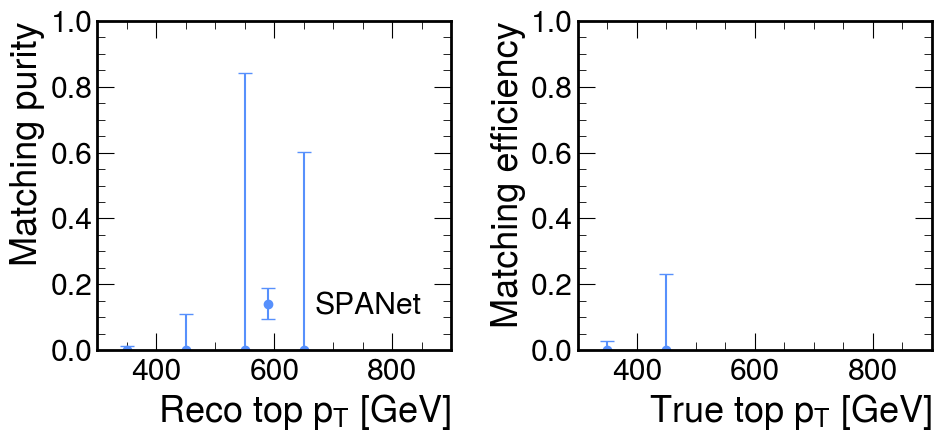

In [129]:
# dp_cut = 0.85
# LUT_pred_spanet, LUT_target_spanet = parse_pred_w_target(test_h5, s_h5, dp_cut=dp_cut)
# LUT_pred_baseline, LUT_target_baseline = parse_pred_w_target(
#     test_h5, b_h5, dp_cut=dp_cut
# )
# eff_s, efferr_s = calc_eff(LUT_pred_spanet, bins)
# eff_b, efferr_b = calc_eff(LUT_pred_baseline, bins)
# pur_s, purerr_s = calc_pur(LUT_target_spanet, bins)
# pur_b, purerr_b = calc_pur(LUT_target_baseline, bins)

# full tops efficincies
eff_s, efferr_s = calc_eff(LUT_pred_spanet, bins)
# eff_b, efferr_b = calc_eff(LUT_pred_baseline, bins)
pur_s, purerr_s = calc_eff(LUT_target_spanet, bins)
# pur_b, purerr_b = calc_eff(LUT_target_baseline, bins)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(
    x=bin_centers, y=eff_s, yerr=efferr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[0].errorbar(
#     x=bin_centers, y=eff_b, yerr=efferr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[0].set(xlabel=r"Reco top $p_T$ [GeV]", ylabel=r"Matching purity")
ax[0].set_ylim(0, 1)
ax[0].set_xlim(300, 900)

ax[1].errorbar(
    x=bin_centers, y=pur_s, yerr=purerr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[1].errorbar(
#     x=bin_centers, y=pur_b, yerr=purerr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[1].set(xlabel=r"True top $p_T$ [GeV]", ylabel=r"Matching efficiency")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(300, 900)

ax[0].legend()
# ax[1].legend()
plt.tight_layout()
plt.savefig("spanet_baseline_pur_eff.pdf")

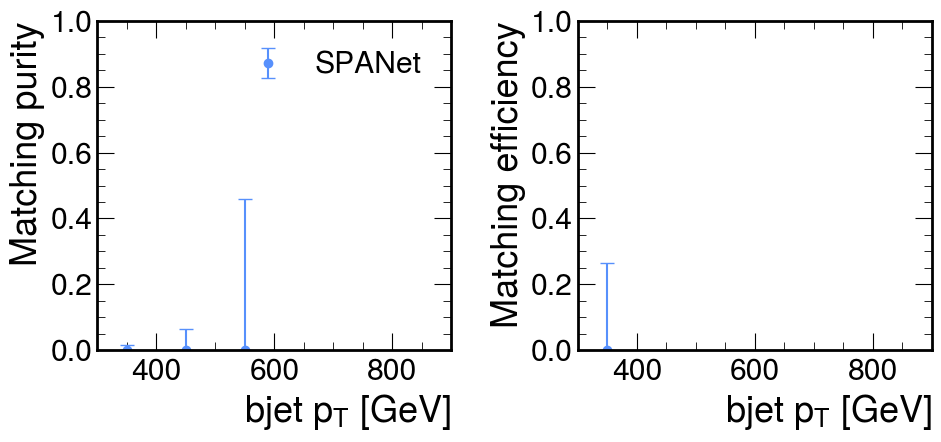

In [130]:
# individual jet efficiencies
b_eff_s, b_efferr_s = calc_eff(bLUT_pred_spanet, bins)
# b_eff_b, b_efferr_b = calc_eff(bLUT_pred_baseline, bins)
b_pur_s, b_purerr_s = calc_eff(bLUT_target_spanet, bins)
# b_pur_b, b_purerr_b = calc_eff(bLUT_target_baseline, bins)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(
    x=bin_centers, y=b_eff_s, yerr=b_efferr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[0].errorbar(
#     x=bin_centers, y=b_eff_b, yerr=b_efferr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[0].set(xlabel=r"bjet $p_T$ [GeV]", ylabel=r"Matching purity")
ax[0].set_ylim(0, 1)
ax[0].set_xlim(300, 900)

ax[1].errorbar(
    x=bin_centers, y=b_pur_s, yerr=b_purerr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[1].errorbar(
#     x=bin_centers, y=b_pur_b, yerr=b_purerr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[1].set(xlabel=r"bjet $p_T$ [GeV]", ylabel=r"Matching efficiency")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(300, 900)

ax[0].legend()
# ax[1].legend()
plt.tight_layout()
plt.savefig("spanet_baseline_bjet_pur_eff.pdf")

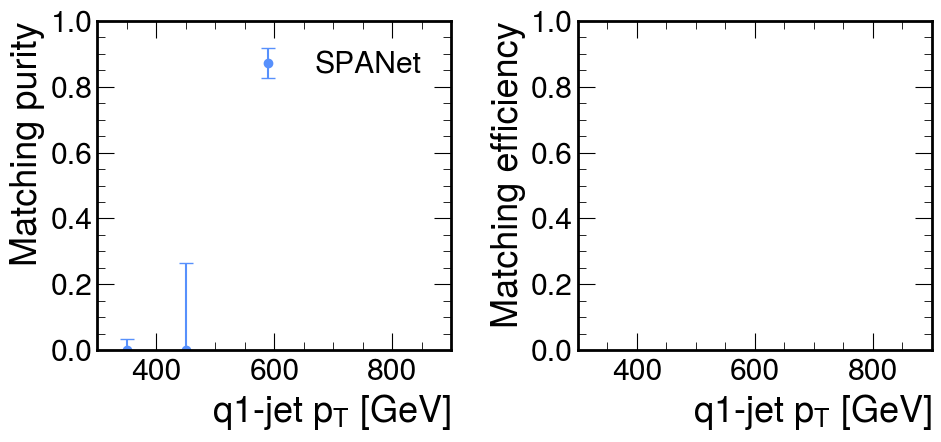

In [131]:
# individual jet efficiencies
q1_eff_s, q1_efferr_s = calc_eff(q1LUT_pred_spanet, bins)
# q1_eff_b, q1_efferr_b = calc_eff(q1LUT_pred_baseline, bins)
q1_pur_s, q1_purerr_s = calc_eff(q1LUT_target_spanet, bins)
# q1_pur_b, q1_purerr_b = calc_eff(q1LUT_target_baseline, bins)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(
    x=bin_centers, y=q1_eff_s, yerr=q1_efferr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[0].errorbar(
#     x=bin_centers, y=q1_eff_b, yerr=q1_efferr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[0].set(xlabel=r"q1-jet $p_T$ [GeV]", ylabel=r"Matching purity")
ax[0].set_ylim(0, 1)
ax[0].set_xlim(300, 900)

ax[1].errorbar(
    x=bin_centers, y=q1_pur_s, yerr=q1_purerr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[1].errorbar(
#     x=bin_centers, y=q1_pur_b, yerr=q1_purerr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[1].set(xlabel=r"q1-jet $p_T$ [GeV]", ylabel=r"Matching efficiency")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(300, 900)

ax[0].legend()
# ax[1].legend()
plt.tight_layout()
plt.savefig("spanet_baseline_q1jet_pur_eff.pdf")

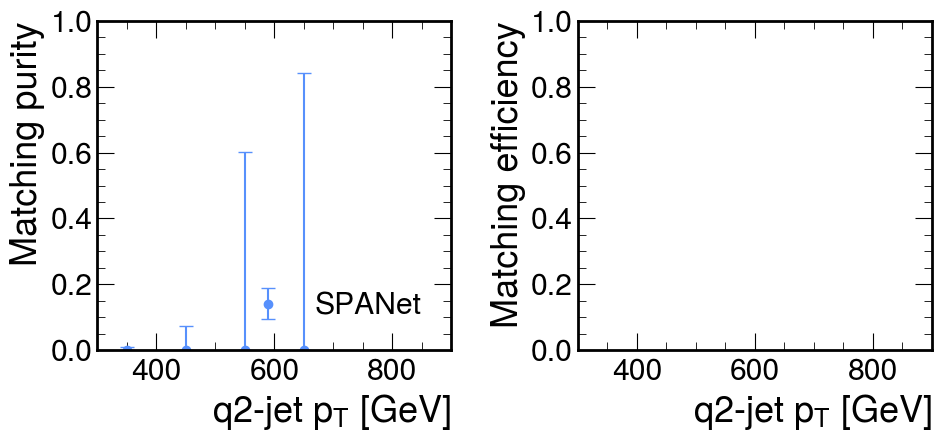

In [132]:
# individual jet efficiencies
q2_eff_s, q2_efferr_s = calc_eff(q2LUT_pred_spanet, bins)
# q2_eff_b, q2_efferr_b = calc_eff(q2LUT_pred_baseline, bins)
q2_pur_s, q2_purerr_s = calc_eff(q2LUT_target_spanet, bins)
# q2_pur_b, q2_purerr_b = calc_eff(q2LUT_target_baseline, bins)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(
    x=bin_centers, y=q2_eff_s, yerr=q2_efferr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[0].errorbar(
#     x=bin_centers, y=q2_eff_b, yerr=q2_efferr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[0].set(xlabel=r"q2-jet $p_T$ [GeV]", ylabel=r"Matching purity")
ax[0].set_ylim(0, 1)
ax[0].set_xlim(300, 900)

ax[1].errorbar(
    x=bin_centers, y=q2_pur_s, yerr=q2_purerr_s, fmt="o", capsize=5, label="SPANet"
)
# ax[1].errorbar(
#     x=bin_centers, y=q2_pur_b, yerr=q2_purerr_b, fmt="x", capsize=5, label="Baseline"
# )
ax[1].set(xlabel=r"q2-jet $p_T$ [GeV]", ylabel=r"Matching efficiency")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(300, 900)

ax[0].legend()
# ax[1].legend()
plt.tight_layout()
plt.savefig("spanet_baseline_q2jet_pur_eff.pdf")